# Calculating financial returns in Python

One of the most important tasks in financial markets is to analyze historical returns on various investments. To perform this analysis we need historical data for the assets. There are many data providers, some are free most are paid. In this chapter we will use the data from Yahoo’s finance website. In python we can do this using the pandas-datareader module.

In this post we will- :

Download pr- ices
Calculate Re- turns
Calculate mean and standard deviation of r
eturns
Lets load the modules first.

In [21]:
import pytz
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

## Individual Stock

### Downloading the stock price for Netflix

Netflix has seen phenomenal growth since 2009. It was responsible for producing a new category of business - subscription based online streaming. It has changed the industry landscape and pushed Blockbuster our of business. Old media companies like CBS, Fox, Viacom, Disney etc are under threat from the new way of consuming media. Netflix started as a content delivery platform, but today its responsible for content creation as well. Its original programs have won several Emmy awards. Today Netflix seems like an unstoppable force in the media landscape.

To see just how well Netflix’s stock has performed, we will start by downloading the historical price for Netflix and then perform the return calculations.

In [4]:
netflix = pdr.get_data_yahoo("NFLX",
                             start = "2009-01-01",
                             end = "2018-03-01")

[*********************100%%**********************]  1 of 1 completed


In [6]:
print(netflix.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2009-01-02  4.217143  4.357143  4.200000  4.267143   4.267143   6605200
2009-01-05  4.327143  4.562857  4.302857  4.562857   4.562857  13044500
2009-01-06  4.591429  4.750000  4.590000  4.705714   4.705714  12065900
2009-01-07  4.715714  4.734286  4.571429  4.672857   4.672857  10133900
2009-01-08  4.618571  4.797143  4.485714  4.735714   4.735714   8175300


Next we will chart the Netflix’s adjusted closing price.

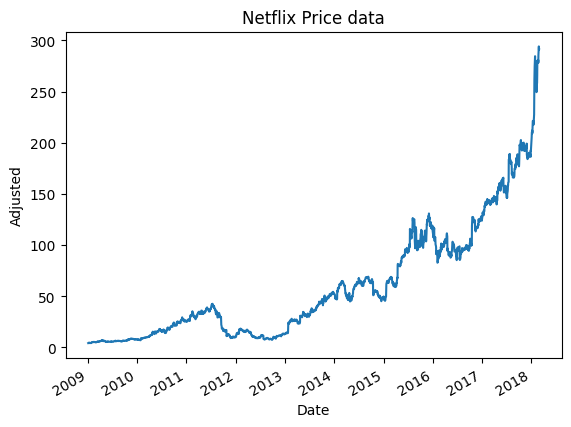

In [7]:
netflix['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Netflix Price data")
plt.show()

### Calculating the daily and monthly returns for individual stock

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use pandas package to do the calculations. We have already downloaded the price data for Netflix above, if you haven’t done that then see the above section. We will calculate the monthly and daily price returns.

In [8]:
netflix_daily_returns = netflix['Adj Close'].pct_change()
netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()

Looking at the head of the daily returns.

In [9]:
print(netflix_daily_returns.head())

Date
2009-01-02         NaN
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
2009-01-08    0.013452
Name: Adj Close, dtype: float64


Looking at the head of the monthly returns.

In [11]:
print(netflix_monthly_returns.head())

Date
2009-01-31         NaN
2009-02-28    0.002767
2009-03-31    0.184327
2009-04-30    0.055685
2009-05-31   -0.129993
Freq: M, Name: Adj Close, dtype: float64


### Charting the daily and monthly for Netflix

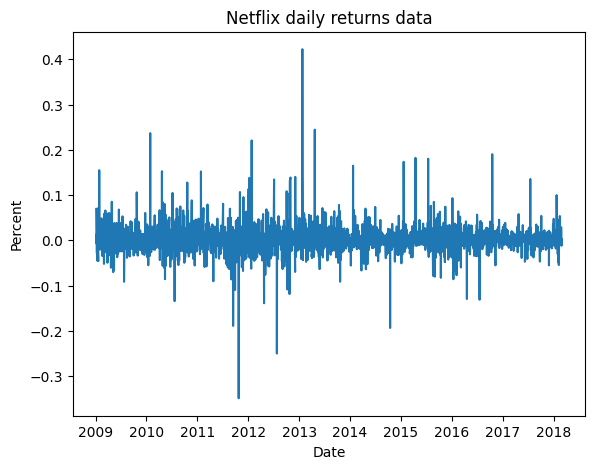

In [12]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

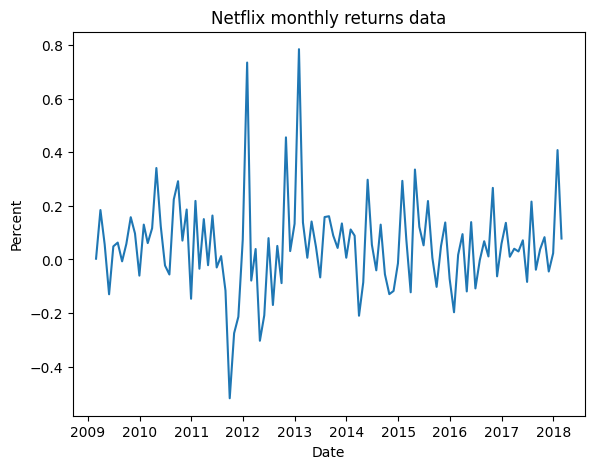

In [13]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix monthly returns data")
plt.show()

After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 5% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

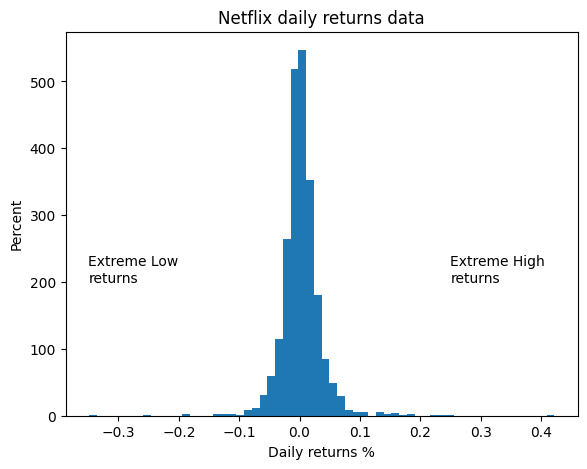

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

### Calculating the cumulative returns for the Netflix stock

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other word, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the **cumprod()** function.

In [15]:
netflix_cum_returns = (netflix_daily_returns + 1).cumprod()

Next we can chart the cumulative returns of Netflix.

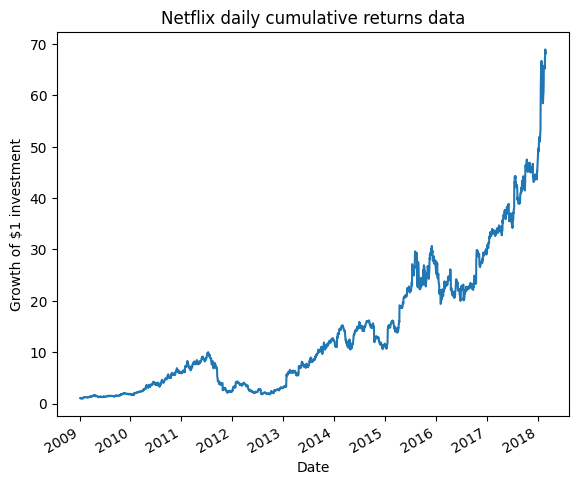

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

This chart shows the cumulative returns since 2009 for Netflix. With the power of hindsight, one could have made $70 on a $1 investment since 2009. That is quite a remarkable performance. But as we know its easier said then done. During the 10 year or so period there were times when the investment lost 50% of its value during the [Qwickster fiasco](https://www.codingfinance.com/post/2018-04-03-calc-returns-py/%22https://som.yale.edu/case/2012/netflix-and-qwikster%22). Very few investors can hold onto investments through such periods.

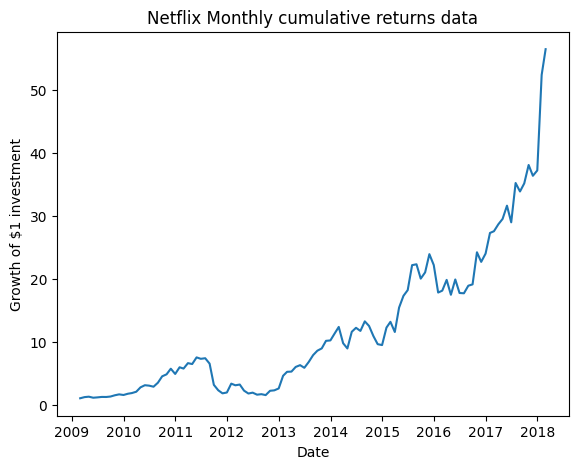

In [17]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns = (netflix_monthly_returns + 1).cumprod()
ax1.plot(netflix_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix Monthly cumulative returns data")
plt.show()

We can visualize that the monthly returns chart is much more smoother than the daily chart.

## Multiple stocks

### Downloading stock market data for multiple stocks.

We can download the financial data for multiple stocks. We first assign the stock symbols to a variable named "tickers", and use that to download the stock prices.

In [28]:
tz = pytz.timezone("America/New_York")
tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOGL"]
start = tz.localize(dt.datetime(2013, 1, 1))
end = tz.localize(dt.datetime(2018, 3, 1))
multpl_stocks = pdr.get_data_yahoo(tickers,
                                   start = start,
                                   end = end)



[*********************100%%**********************]  5 of 5 completed


### Charting the stock prices for multiple stocks

Next we will chart the stock prices for multiple stocks

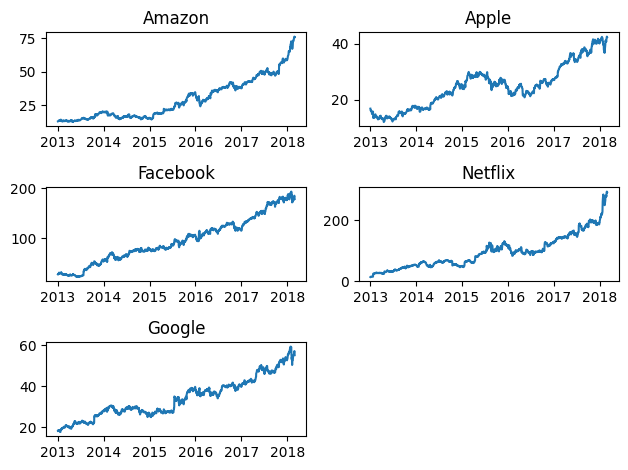

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(multpl_stocks['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['META'])
ax3.set_title("Facebook")
ax4.plot(multpl_stocks['Adj Close']['NFLX'])
ax4.set_title("Netflix")
ax5.plot(multpl_stocks['Adj Close']['GOOGL'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### Calculating the returns for multiple stocks

Calculating the the returns for multiple stocks is just as easy as the single stock.

In [31]:
multpl_stocks.index = pd.to_datetime(multpl_stocks.index)
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

<Figure size 640x480 with 0 Axes>

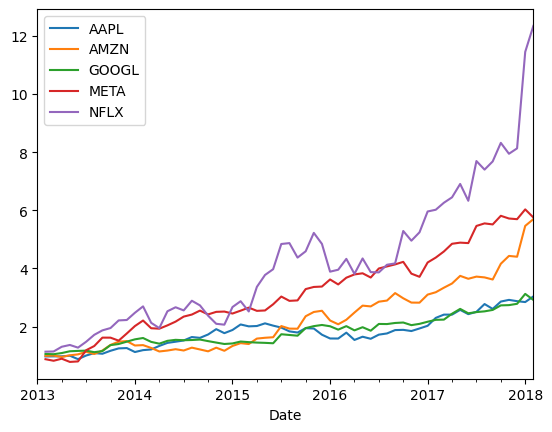

In [32]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

Not surprisingly, Netflix had the best returns since 2013. Amazon and Facebook come in distant second and third. The most surprising result is Google. It has severely under performed the other stocks in the FAANG group. Maybe the market participants are worried about its spending on the moon shot projects (Google glass, X Labs, Waymo etc). Whether these projects can produce results is yet to be seen.

A contrarian could argue that given the investments in the future projects, Google is currently undervalued an could be the better investment among the FAANG stocks.

## Statistical Data

### Calculating the Mean, standard deviation and other stats

We already have the daily and monthly returns data for Netflix. Now we we will calculate the daily and monthly mean and standard deviations of the returns. We will use **mean()** and **std()** functions for our purpose.

In [33]:
print(multpl_stock_monthly_returns.mean())

AAPL     0.020526
AMZN     0.031975
GOOGL    0.019290
META     0.032669
NFLX     0.049390
dtype: float64


In [34]:
print(multpl_stock_monthly_returns.std())

AAPL     0.065948
AMZN     0.080660
GOOGL    0.058102
META     0.090207
NFLX     0.126154
dtype: float64


### Calculating the correlation and covariance using pandas

In [35]:
print(multpl_stock_monthly_returns.corr())

           AAPL      AMZN     GOOGL      META      NFLX
AAPL   1.000000  0.295815  0.211904  0.182580  0.240342
AMZN   0.295815  1.000000  0.624927  0.198235  0.475246
GOOGL  0.211904  0.624927  1.000000  0.265170  0.455993
META   0.182580  0.198235  0.265170  1.000000  0.229613
NFLX   0.240342  0.475246  0.455993  0.229613  1.000000


In [36]:
print(multpl_stock_monthly_returns.cov())

           AAPL      AMZN     GOOGL      META      NFLX
AAPL   0.004349  0.001574  0.000812  0.001086  0.002000
AMZN   0.001574  0.006506  0.002929  0.001442  0.004836
GOOGL  0.000812  0.002929  0.003376  0.001390  0.003342
META   0.001086  0.001442  0.001390  0.008137  0.002613
NFLX   0.002000  0.004836  0.003342  0.002613  0.015915


## Summary

We did a lot in this port.

- Download prices
- Calculate returns
- Calculate mean and standard deviations
- Calculate the correlation and covariance of stocks